# Total Variation and Image Processing

Lab Objective: Minimizing an energy functional is equivalent to solving the
resulting Euler-Lagrange equations. We introduce the method of steepest descent
to solve these equations, and apply this technique to a denoising problem in image
processing.

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.integrate import quad
from numpy.linalg import norm
%matplotlib inline
from matplotlib import pyplot as plt

## Problem 1

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


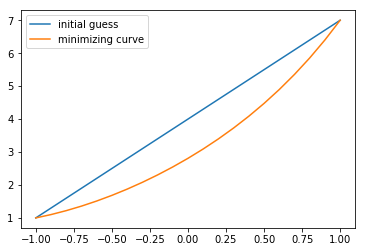

In [2]:
a, b = -1, 1.
alpha, beta = 1., 7.
x_steps = 20.
time_steps = 250.
final_T = .2
#### Define variables x_steps, final_T, time_steps ####
delta_t, delta_x = final_T/time_steps, (b-a)/x_steps
x0 = np.linspace(a,b,x_steps+1)
# Check a stability condition for this numerical method
if delta_t/delta_x**2. > .5:
    print "stability condition fails"
u = np.empty((2,x_steps+1))
u[0] = (beta - alpha)/(b-a)*(x0-a) + alpha
u[1] = (beta - alpha)/(b-a)*(x0-a) + alpha

plt.plot(x0,u[0],label = 'initial guess')
def rhs(y):
    # Approximate first and second derivatives to second order accuracy.
    yp = (np.roll(y,-1) - np.roll(y,1))/(2.*delta_x)
    ypp = (np.roll(y,-1) - 2.*y + np.roll(y,1))/delta_x**2.
    # Find approximation for the next time step, using a first order Euler step
    y[1:-1] -= delta_t*(1. + yp[1:-1]**2. - 1.*y[1:-1]*ypp[1:-1])

# Time step until successive iterations are close
iteration = 0
while iteration < time_steps:
    rhs(u[1])
    if norm(np.abs((u[0] - u[1]))) < 1e-5: break
    u[0] = u[1]
    iteration+=1

plt.plot(x0,u[0], label = 'minimizing curve')
plt.legend(loc='best')

plt.show()

# Problem 2

In [3]:
from numpy.random import random_integers, uniform, randn
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.misc import imread, imsave
imagename = 'balloons_resized_bw.jpg'
changed_pixels=40000
# Read the image file imagename into an array of numbers, IM
# Multiply by 1. / 255 to change the values so that they are floating point
# numbers ranging from 0 to 1.
IM = imread(imagename, flatten=True) * (1. / 255)
IM_x, IM_y = IM.shape
for lost in xrange(changed_pixels):
    x_,y_ = random_integers(1,IM_x-2), random_integers(1,IM_y-2)
    val = .1*randn() + .5
    IM[x_,y_] = max( min(val,1.), 0.)
imsave(name=("noised_"+imagename),arr=IM)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: This function is deprecated. Please call randint(1, 798 + 1) instead
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: This function is deprecated. Please call randint(1, 598 + 1) instead


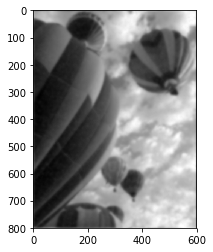

In [4]:
#a, b = -1, 1.
#alpha, beta = 1., 7.
#### Define variables x_steps, final_T, time_steps ####
x_steps = 20.
time_steps = 250.
final_T = .2
delta_t = 1e-3
lambd = 40
delta_x = 1.
delta_y = 1.




u = imread('noised_balloons_resized_bw.jpg')
f = u.copy()

def rhs(y):
    # Approximate first and second derivatives to second order accuracy.
    u_xx = np.roll(u,-1,axis=1) - 2*u + np.roll(u,1,axis=1)
    u_yy = np.roll(u,-1,axis=0) - 2*u + np.roll(u,1,axis=0)
    # Find approximation for the next time step, using a first order Euler step
    u_t = -1*(u-f-lambd*(u_xx+u_yy))
    new_u = u_t*delta_t+u
    return new_u
    

# Time step until successive iterations are close
iteration = 0
while iteration < time_steps:
    u_copy = u.copy()
    u = rhs(u)
    if norm(np.abs((u_copy-u))) < 1e-5: break
    iteration+=1

plt.imshow(u,cmap=cm.gray)
plt.show()

# Problem 3

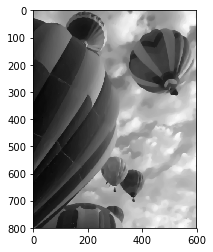

Epsilon needs to be around 1e-6


In [9]:
time_steps = 200.
delta_t = 1e-3
lambd = 1.
delta_x = 1.
delta_y = 1.

eps = 1e-6
u = imread('noised_balloons_resized_bw.jpg', flatten=True)*1./255
f = u.copy()

def rhs(y):
    # Approximate first and second derivatives to second order accuracy.
    u_y = (np.roll(u,-1,axis=0) - np.roll(u,1,axis=0))/2.
    u_x = (np.roll(u,-1,axis=1) - np.roll(u,1,axis=1))/2.
    u_xx = np.roll(u,-1,axis=1) - 2*u + np.roll(u,1,axis=1)
    u_yy = np.roll(u,-1,axis=0) - 2*u + np.roll(u,1,axis=0)
    u_xy = (np.roll(u_x,-1,axis=0) - np.roll(u_x,1,axis=0))/2.
    # Find approximation for the next time step, using a first order Euler step
    u_t = -lambd*(u-f)+(u_xx*u_y**2+u_yy*u_x**2-2*u_x*u_y*u_xy)/((eps+u_x**2+u_y**2)**(3./2))
    new_u = u_t*delta_t+u
    return new_u
    

# Time step until successive iterations are close
iteration = 0
while iteration < time_steps:
    u_copy = u.copy()
    u = rhs(u)
    #if norm(np.abs((u_copy-u))) < 1e-5: break
    iteration+=1

plt.imshow(u,cmap=cm.gray)
plt.show()
print "Epsilon needs to be around 1e-6"